In [16]:
# Install these packages before you hit Source
library(car)      # For normality plots
library(moments)  # For skew calculations
library(lattice)  # Use trellis graphics
library(lubridate) # For dates
library(manipulate)

In [2]:
# Read in the dataset
Stocks <- read.csv("D:/Data/FourStocks.csv", header=TRUE)
head(Stocks)
tail(Stocks)

,Date,Pharma,FMCG,Power,Steel
1,2-Jan-95,98.75,59,13.61,150.98
2,3-Jan-95,101.25,58.5,13.27,150.25
3,4-Jan-95,101.25,58,13.27,148.77
4,5-Jan-95,98.75,57,13.03,145.09
5,6-Jan-95,95,56.5,12.79,141.41
6,9-Jan-95,97.5,57,12.55,138.46


,Date,Pharma,FMCG,Power,Steel
4940,23-Dec-14,3205.25,765.95,81.45,395.15
4941,24-Dec-14,3139.15,756.8,81.3,395.4
4942,26-Dec-14,3129.85,750.95,81.2,398.15
4943,29-Dec-14,3140.45,758.6,81.4,404.3
4944,30-Dec-14,3180.55,759.6,81.45,396.45
4945,31-Dec-14,3244.95,759.5,82.15,399.35


In [3]:
#Prints means
#print(colMeans(Stocks[ , 2:5]))
print(round(apply(Stocks[ , 2:5], MARGIN=2, FUN=mean),2))
#Print median
print(round(apply(Stocks[ , 2:5], MARGIN=2, FUN=median),2))
#Prints STD
print(round(apply(Stocks[ , 2:5], MARGIN=2, FUN=sd),2))

Pharma   FMCG  Power  Steel 
774.45 248.38  51.05 287.20 
Pharma   FMCG  Power  Steel 
481.05 215.55  36.38 245.10 
Pharma   FMCG  Power  Steel 
749.61 150.69  43.64 212.03 


   Pharma      FMCG     Power     Steel 
1.4052686 1.5324310 0.5690035 0.6753831 


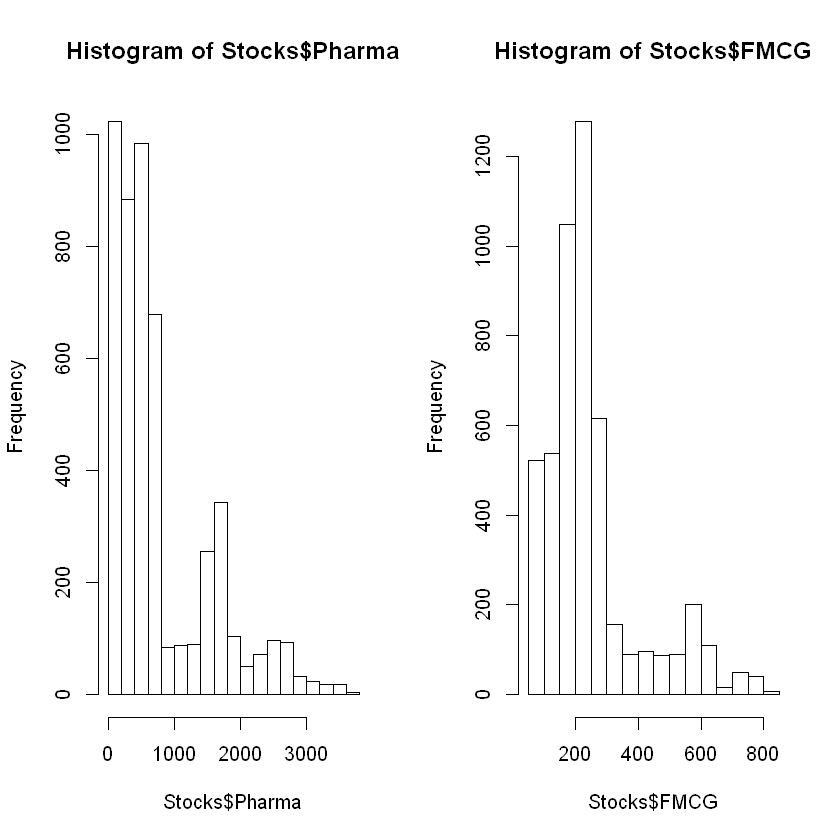

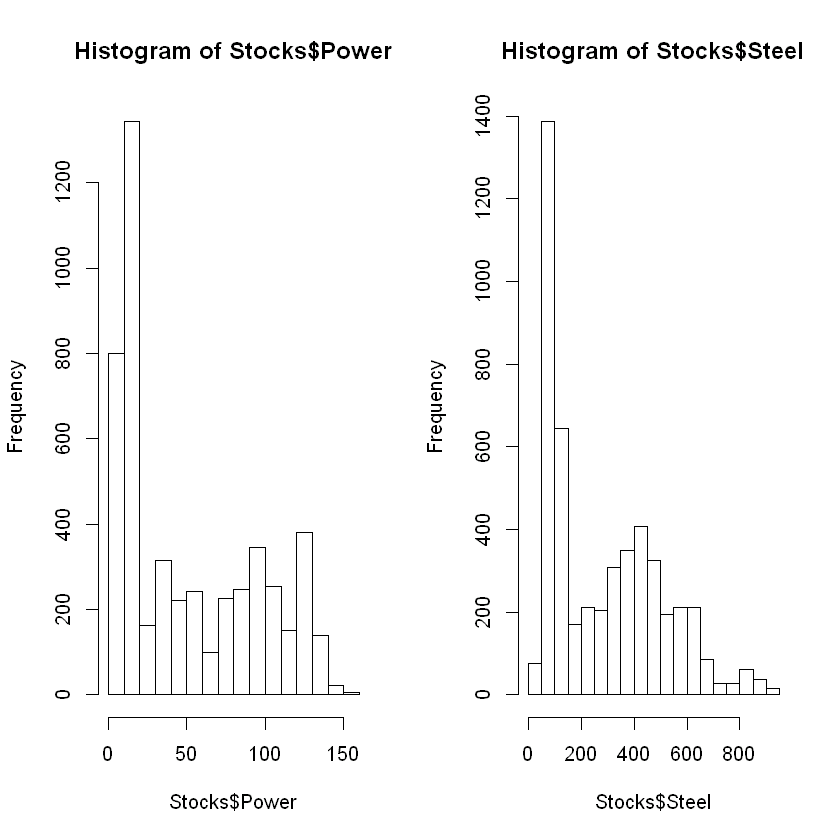

In [4]:
#Uses moments library for skew
print(skewness(Stocks[ , 2:5]))
# the Steel stock
par(mfrow=c(1,2))
hist(Stocks$Pharma)
hist(Stocks$FMCG)
hist(Stocks$Power)
hist(Stocks$Steel)

In [5]:
# Format the Date field based on what is 
# contained in the Date column
Stocks$Date <- as.Date(Stocks$Date, "%d-%b-%y")

# Capture the month and year data in different columns. 
# The "accessor" functions are courtesy the lubridate library!
Stocks$Month <- month(Stocks$Date)
Stocks$Year <- year(Stocks$Date)

# View the newly formatted data
head(Stocks)
tail(Stocks)

,Date,Pharma,FMCG,Power,Steel,Month,Year
1,1995-01-02,98.75,59,13.61,150.98,1,1995
2,1995-01-03,101.25,58.5,13.27,150.25,1,1995
3,1995-01-04,101.25,58,13.27,148.77,1,1995
4,1995-01-05,98.75,57,13.03,145.09,1,1995
5,1995-01-06,95,56.5,12.79,141.41,1,1995
6,1995-01-09,97.5,57,12.55,138.46,1,1995


,Date,Pharma,FMCG,Power,Steel,Month,Year
4940,2014-12-23,3205.25,765.95,81.45,395.15,12,2014
4941,2014-12-24,3139.15,756.8,81.3,395.4,12,2014
4942,2014-12-26,3129.85,750.95,81.2,398.15,12,2014
4943,2014-12-29,3140.45,758.6,81.4,404.3,12,2014
4944,2014-12-30,3180.55,759.6,81.45,396.45,12,2014
4945,2014-12-31,3244.95,759.5,82.15,399.35,12,2014


In [6]:
# Write the contents of Stocks to a file
write.csv(Stocks, "D:/Data/NewStocks.csv")
cat("Created NewStocks.csv in D:/Data/\n","You may open it as a spreadsheet!\n")

Created NewStocks.csv in D:/Data/
 You may open it as a spreadsheet!


In [7]:
# Here's an easy way to construct a table of average values by month
monthYearAvePharma <- aggregate(Pharma ~ Month + Year,data=Stocks,FUN=mean)
#View(monthYearAvePharma)
print(monthYearAvePharma)

    Month Year     Pharma
1       1 1995   95.35714
2       2 1995   87.89474
3       3 1995   86.64526
4       4 1995   84.02375
5       5 1995   76.99429
6       6 1995   72.42045
7       7 1995   70.68750
8       8 1995   73.11765
9       9 1995   71.96429
10     10 1995   73.25000
11     11 1995   59.16667
12     12 1995   56.25000
13      1 1996   52.68182
14      2 1996   63.83250
15      3 1996   65.72500
16      4 1996   68.25789
17      5 1996   72.29381
18      6 1996   76.70800
19      7 1996   76.09043
20      8 1996   66.70400
21      9 1996   64.24111
22     10 1996   53.90571
23     11 1996   53.57056
24     12 1996   40.44235
25      1 1997   44.98682
26      2 1997   43.72300
27      3 1997   53.22250
28      4 1997   53.36000
29      5 1997   53.86950
30      6 1997   59.50095
31      7 1997   73.98174
32      8 1997   76.52056
33      9 1997   70.18545
34     10 1997   79.20167
35     11 1997   79.29250
36     12 1997   76.86727
37      1 1998   82.92900
38      2 19

In [12]:
# Here's an easy way to construct a table of average values by month
monthYearAveFMCG <- aggregate(FMCG ~ Month + Year,data=Stocks,FUN=mean)
#View(monthYearAveFMCG)
print(monthYearAveFMCG)

    Month Year      FMCG
1       1 1995  58.21429
2       2 1995  58.02632
3       3 1995  56.94737
4       4 1995  56.68750
5       5 1995  57.15714
6       6 1995  59.05455
7       7 1995  59.82000
8       8 1995  60.01176
9       9 1995  59.70476
10     10 1995  63.26667
11     11 1995  59.48571
12     12 1995  60.98750
13      1 1996  62.83636
14      2 1996  69.63500
15      3 1996  69.77778
16      4 1996  74.71053
17      5 1996  77.45286
18      6 1996  85.19800
19      7 1996  85.64217
20      8 1996  84.94150
21      9 1996  82.34500
22     10 1996  79.89238
23     11 1996  79.54556
24     12 1996  79.08176
25      1 1997  86.25909
26      2 1997  89.15300
27      3 1997 100.25650
28      4 1997 105.06263
29      5 1997 107.07000
30      6 1997 129.87190
31      7 1997 137.50826
32      8 1997 146.07500
33      9 1997 137.03045
34     10 1997 137.96278
35     11 1997 132.19050
36     12 1997 134.44091
37      1 1998 135.36900
38      2 1998 146.60368
39      3 1998 158.51238


In [13]:
# Here's an easy way to construct a table of average values by month
monthYearAvePower <- aggregate(Power ~ Month + Year,data=Stocks,FUN=mean)
#view(monthYearAvePower)
print(monthYearAvePower)

    Month Year      Power
1       1 1995  13.055238
2       2 1995  12.818947
3       3 1995  12.379474
4       4 1995  11.810000
5       5 1995  11.130476
6       6 1995  12.444091
7       7 1995  11.411000
8       8 1995  10.860000
9       9 1995  10.137143
10     10 1995  11.430000
11     11 1995  10.578095
12     12 1995  11.066875
13      1 1996  11.878636
14      2 1996  14.263000
15      3 1996  14.165556
16      4 1996  15.278421
17      5 1996  15.748571
18      6 1996  18.429500
19      7 1996  16.832609
20      8 1996  14.957000
21      9 1996  13.829444
22     10 1996  11.780476
23     11 1996  11.032222
24     12 1996  10.654706
25      1 1997  13.056364
26      2 1997  13.077500
27      3 1997  13.512500
28      4 1997  12.903684
29      5 1997  12.931500
30      6 1997  13.405714
31      7 1997  13.432609
32      8 1997  13.147222
33      9 1997  11.626364
34     10 1997  11.771111
35     11 1997  10.028500
36     12 1997  10.142727
37      1 1998  10.851000
38      2 19

In [15]:
# Here's an easy way to construct a table of average values by month
monthYearAveSteel <- aggregate(Steel ~ Month + Year,data=Stocks,FUN=mean)
#view(monthYearAveSteel)
print(monthYearAveSteel)

    Month Year     Steel
1       1 1995 139.44429
2       2 1995 131.91263
3       3 1995 134.00526
4       4 1995 131.32750
5       5 1995 120.09238
6       6 1995 136.42727
7       7 1995 136.19500
8       8 1995 138.68882
9       9 1995 139.94952
10     10 1995 148.03889
11     11 1995 133.36286
12     12 1995 118.10250
13      1 1996 103.77364
14      2 1996 118.26000
15      3 1996 113.22556
16      4 1996 131.08263
17      5 1996 138.21048
18      6 1996 149.86450
19      7 1996 127.91565
20      8 1996 111.75750
21      9 1996 106.92500
22     10 1996 103.82619
23     11 1996  96.12167
24     12 1996  92.00235
25      1 1997 112.28955
26      2 1997 111.94900
27      3 1997 112.45000
28      4 1997 101.31263
29      5 1997 102.91300
30      6 1997 107.41048
31      7 1997 125.05261
32      8 1997 120.79667
33      9 1997 106.09727
34     10 1997 103.25833
35     11 1997  88.10200
36     12 1997  75.29864
37      1 1998  76.44750
38      2 1998  72.80632
39      3 1998  84.62381


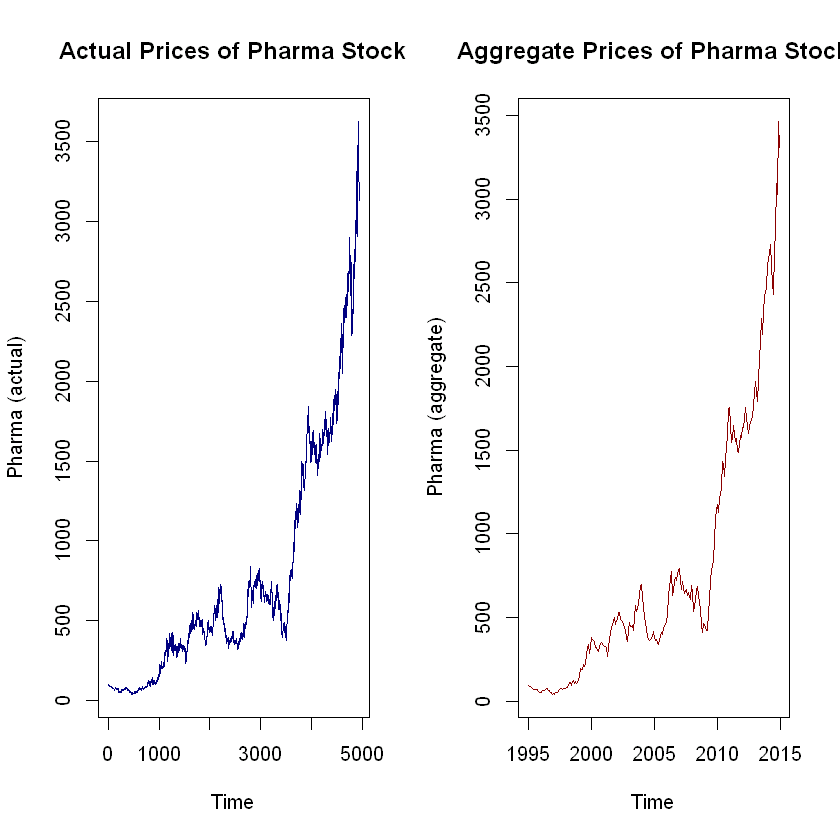

In [8]:
# Let's plot and compare the actual vs aggregated prices
par(mfrow=c(1,2))

# the Pharma stock
ts.Pharma <- ts(Stocks$Pharma)
plot(ts.Pharma,main="Actual Prices of Pharma Stock",col="navy", ylab="Pharma (actual)")

ts.PharmaAvg <- ts(monthYearAvePharma$Pharma,start=c(1995, 1), end=c(2014, 12),frequency=12)
plot(ts.PharmaAvg,main="Aggregate Prices of Pharma Stock",col="darkred", ylab="Pharma (aggregate)")

ERROR: Error in is.data.frame(data): object 'monthYearAveFMCG' not found


ERROR: Error in plot(ts.FMCGAvg, main = "Aggregate Prices of FMCG Stock", col = "darkred", : object 'ts.FMCGAvg' not found


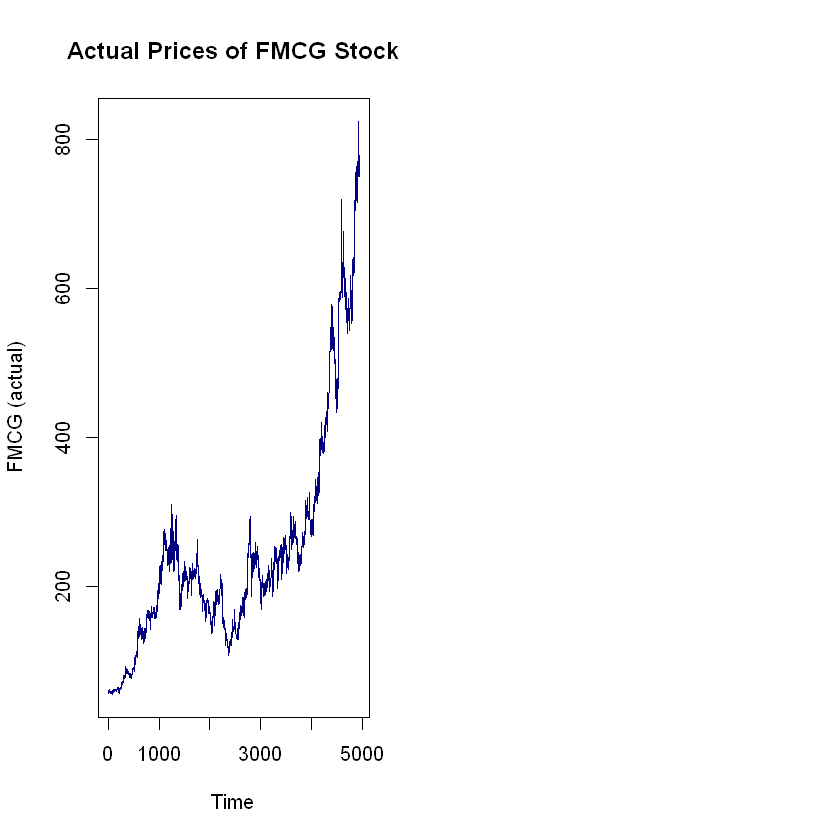

In [9]:
# the FMCG stock
par(mfrow=c(1,2))
ts.FMCG <- ts(Stocks$FMCG)
plot(ts.FMCG,main="Actual Prices of FMCG Stock",col="navy", ylab="FMCG (actual)")

ts.FMCGAvg <- ts(monthYearAveFMCG$FMCG,start=c(1995, 1), end=c(2014, 12),frequency=12)
plot(ts.FMCGAvg, main="Aggregate Prices of FMCG Stock", col="darkred", ylab="FMCG (aggregate)")


ERROR: Error in is.data.frame(data): object 'monthYearAvePower' not found


ERROR: Error in plot(ts.PowerAvg, main = "Aggregate Prices of Power Stock", col = "darkred", : object 'ts.PowerAvg' not found


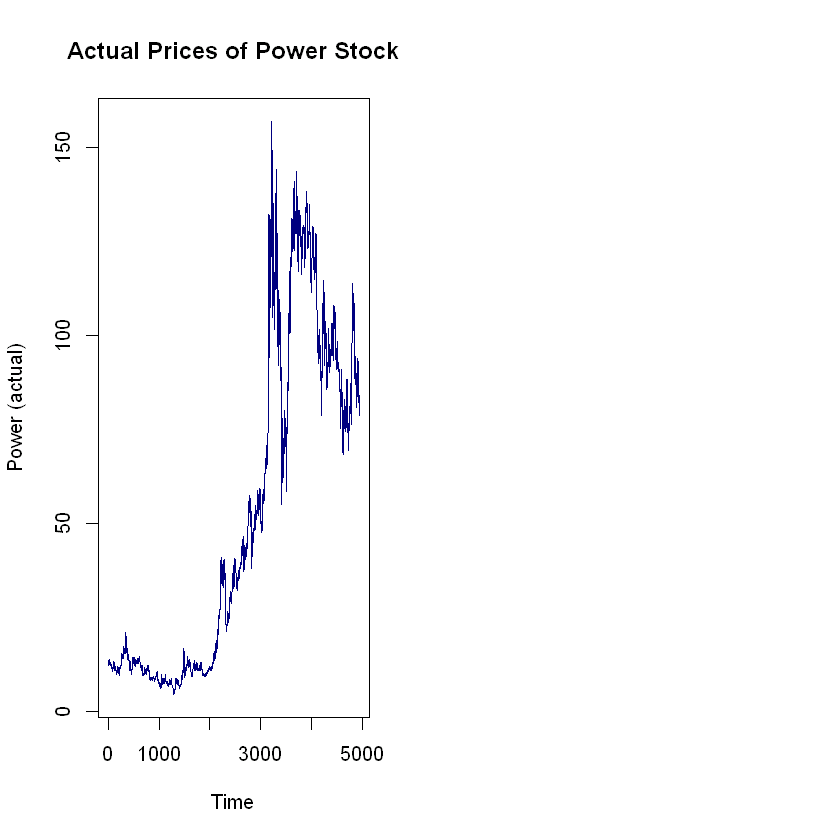

In [10]:
# the Power stock
par(mfrow=c(1,2))
ts.Power <- ts(Stocks$Power)
plot(ts.Power,main="Actual Prices of Power Stock",col="navy", ylab="Power (actual)")

ts.PowerAvg <- ts(monthYearAvePower$Power,start=c(1995, 1), end=c(2014, 12),frequency=12)
plot(ts.PowerAvg, main="Aggregate Prices of Power Stock",col="darkred",ylab="Power (aggregate)")

ERROR: Error in is.data.frame(data): object 'monthYearAveSteel' not found


ERROR: Error in plot(ts.SteelAvg, main = "Aggregate Prices of Steel Stock", col = "darkred", : object 'ts.SteelAvg' not found


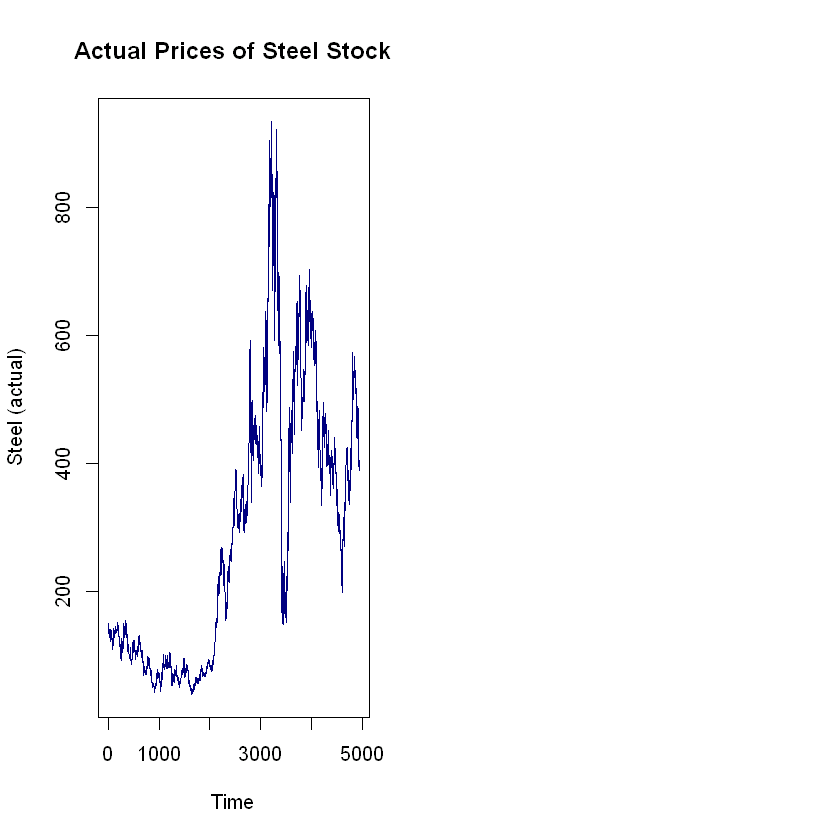

In [11]:
# the Steel stock
par(mfrow=c(1,2))
ts.Steel <- ts(Stocks$Steel)
plot(ts.Steel, main="Actual Prices of Steel Stock", col="navy", ylab="Steel (actual)")

ts.SteelAvg <- ts(monthYearAveSteel$Steel,start=c(1995, 1), end=c(2014, 12),frequency=12)
plot(ts.SteelAvg, main="Aggregate Prices of Steel Stock",col="darkred", ylab="Steel(aggregate)")